In [1]:
# numpy pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import for Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# import for Random forest
from sklearn.ensemble import RandomForestClassifier

# import for KNN
from sklearn.neighbors import KNeighborsClassifier

# imports for Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy import stats 

from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import os

In [2]:
# Class for printing with underline, colors and bold
class bcolors:
    HEADER = '\033[95m'
    OKCYAN = '\033[96m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [3]:
# create folders
directory = "Decision Tree"
parent_dir = "./"
path = os.path.join(parent_dir, directory)
if not os.path.exists(directory): 
    os.mkdir(path)
    
directory = "Best Params"
parent_dir = "./"
path = os.path.join(parent_dir, directory)
if not os.path.exists(directory): 
    os.mkdir(path)

In [4]:
# import csv file
df = pd.read_csv("./csv files/marketing_campaigns_train_after_pre_proc.csv", index_col=0)

In [5]:
df_classifier = df.copy()
l = ['age', 'account_balance', 'n_contact', 'p_days','l_call_duration','n_p_contact','p_days','status_cat','education_cat',
    'profession_cat', 'device_cat', 'month_l_date_cat', 'p_outcome_cat','age_bin','account_balance_bin',
    'education_Pre_Proc_cat','profession_Pre_Proc_cat','device_Pre_Proc_cat', 'p_outcome_Pre_Proc_cat']

df_classifier.drop(l, axis='columns', inplace=True)

In [6]:
df_classifier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30517 entries, 512491 to 516748
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   loan                             30517 non-null  int64  
 1   mortgage                         30517 non-null  int64  
 2   credit                           30517 non-null  int64  
 3   positive                         30517 non-null  int64  
 4   isEmployed_cat                   30517 non-null  int64  
 5   age_min_max                      30517 non-null  float64
 6   n_p_contact_min_max              30517 non-null  float64
 7   p_days_min_max                   30517 non-null  float64
 8   n_contact_min_max                30517 non-null  float64
 9   account_balance_min_max          30517 non-null  float64
 10  l_call_duration_min_max          30517 non-null  float64
 11  status_cat_min_max               30517 non-null  float64
 12  education_Pr

In [7]:
# Split the data to features and target
X = df_classifier.drop('subscribed', axis=1)
y = df_classifier['subscribed']

In [8]:
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

# <font color = 'red'> Decision Tree </font> 

In [9]:
# open the file Best_DT 
f_r = open("./Best Params/Best_DT.txt", "r")
Lines = f_r.read().splitlines()
f_r.close()
best_DT = []
for line in Lines:
    best_DT.append(line)

In [10]:
best_DT

['90.29', 'gini', '3', '2', '4']

### Find the hyperparameters 

#### Randomized Search

In [11]:
dt = DecisionTreeClassifier(splitter='best',random_state=42)

criterion= ['gini','entropy']

max_depth = [k for k in range(2,50)]

min_samples_split = [2,3,4,10,50,100,150,200,250,300,350,400]

min_samples_leaf = [2,3,4,10,50,100,150,200,250,300,350,400]

random_grid = {
               'criterion': criterion, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 200,cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)
dt_random.fit(X_train, y_train)
parameters = dt_random.best_params_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


#### Grid Search

In [12]:
dt = DecisionTreeClassifier(splitter='best',random_state=42)
criterion = [parameters['criterion']]

if parameters['max_depth'] > 2 :
    max_depth = [parameters['max_depth'] - 1 , parameters['max_depth'], parameters['max_depth'] + 2,parameters['max_depth']+3]
else:
    max_depth = [parameters['max_depth'], parameters['max_depth'] + 2,parameters['max_depth']+3]


min_samples_split = [parameters['min_samples_split'],parameters['min_samples_split']+1,parameters['min_samples_split']+2,
                    parameters['min_samples_split']+3]

min_samples_leaf = [parameters['min_samples_leaf'],parameters['min_samples_leaf']+1,parameters['min_samples_leaf']+2,
                   parameters['min_samples_leaf']+3]

param_grid = {
               'criterion': criterion, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
dt_grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2, scoring = 'accuracy')
dt_grid_search.fit(X_train, y_train)
parameters_dt = dt_grid_search.best_params_
parameters_dt

Fitting 10 folds for each of 64 candidates, totalling 640 fits


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 400}

#### Save the best parameters

In [13]:
accuracy = round((dt_grid_search.best_score_)*100,2)
print(bcolors.OKCYAN + 'accuracy after that train:'+ bcolors.ENDC + " ", accuracy ,"%")
if accuracy > float(best_DT[0]):
    f_w = open("./Best Params/Best_DT.txt", "w")
    f_w.write(str(accuracy)+'\n')
    f_w.write(str(parameters_dt['criterion']) + '\n')
    f_w.write(str(parameters_dt['max_depth']) + '\n')
    f_w.write(str(parameters_dt['min_samples_split']) + '\n')
    f_w.write(str(parameters_dt['min_samples_leaf']))
    f_w.close()

else:
    accuracy = float(best_DT[0])
    parameters_dt['criterion'] = best_DT[1]
    parameters_dt['max_depth'] = int(best_DT[2])
    parameters_dt['min_samples_split'] = int(best_DT[3])
    parameters_dt['min_samples_leaf'] = int(best_DT[4])

    
dt = DecisionTreeClassifier(criterion=parameters_dt['criterion'], splitter='best', 
                          max_depth=parameters_dt['max_depth'], min_samples_split=parameters_dt['min_samples_split'],
                            min_samples_leaf=parameters_dt['min_samples_leaf'], random_state=42)
dt.fit(X_train, y_train)
print(dt)

accuracy after that train:  90.24 %
DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=42)


### Visualization

#### Printing Decision Tree

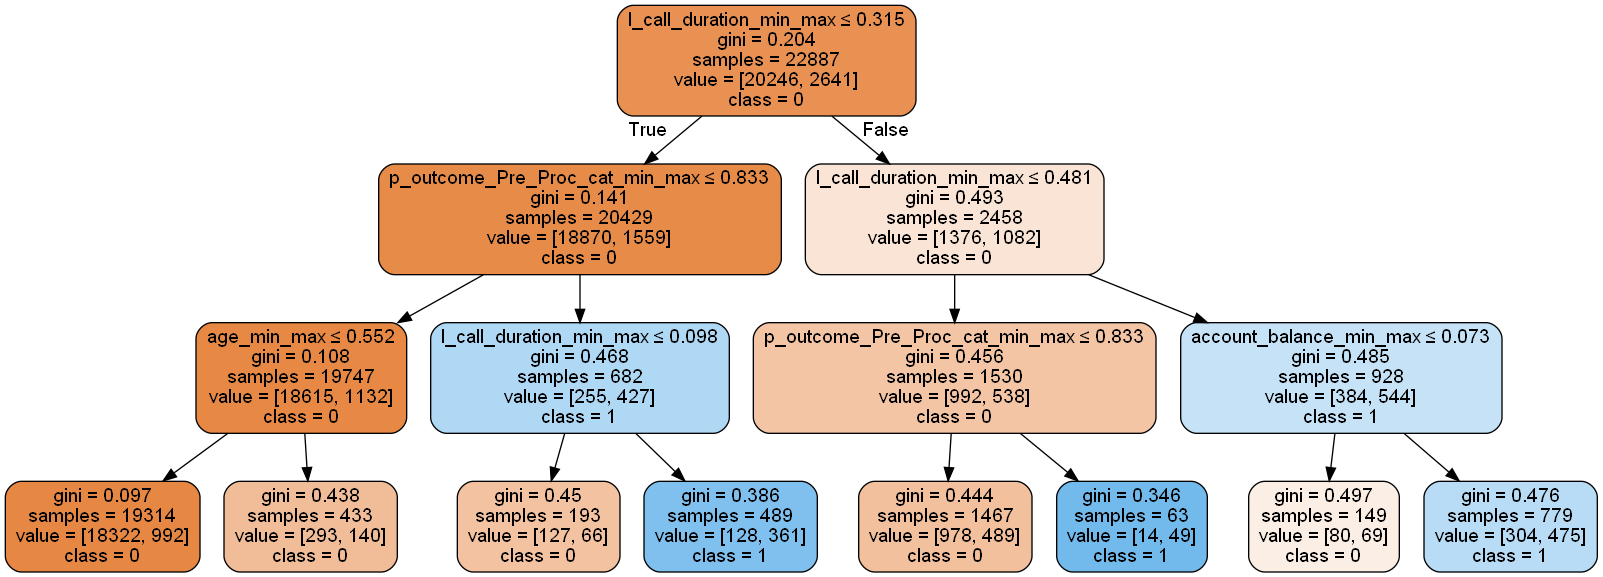

In [14]:
dot = export_graphviz(dt, filled=True, rounded=True, 
                    special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)
graph.write_png('./Decision Tree/theTree.png')
Image(graph.create_png())

#### Check Accuracy VS max_depth

Text(0, 0.5, 'Accuracy')

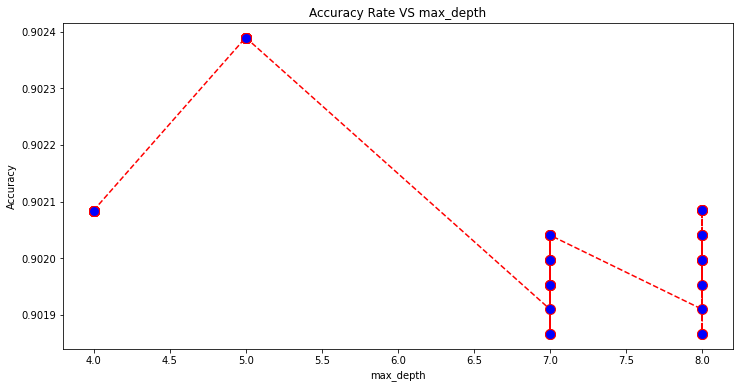

In [15]:
test_scores = dt_grid_search.cv_results_['mean_test_score']
param_values = list(dt_grid_search.cv_results_['param_max_depth'])
plt.figure(figsize=(12, 6))
plt.plot(param_values, test_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate VS max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# <font color = 'red'> Random Forest </font> 

In [ ]:
# open the file Best_RF 
f_r = open("./Best Params/Best_RF.txt", "r")
Lines = f_r.read().splitlines()
f_r.close()
best_RF = []
for line in Lines:
    best_RF.append(line)

#### Randomized Search

In [ ]:
rf = RandomForestClassifier(random_state = 42)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['auto', 'log2', 2, 5, 8]

max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

min_samples_split = [1, 2, 5, 10, 15, 20]

min_samples_leaf = [1, 2, 5, 10]

max_samples = [0.1, 0.3, 0.5, 0.7, 0.9]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

rf_random.fit(X_train, y_train)

#### Grid Search

In [ ]:
parameters_RF = rf_random.best_params_

n_estimators = [parameters_RF['n_estimators']]

max_features = [parameters_RF['max_features']]

if parameters_RF['max_depth'] != None :
    max_depth = [parameters_RF['max_depth'], parameters_RF['max_depth'] + 1, parameters_RF['max_depth'] + 2]
else:
    max_depth = [None]    

min_samples_split = [parameters_RF['min_samples_split'] ,parameters_RF['min_samples_split']+1,
                     parameters_RF['min_samples_split']+2]

min_samples_leaf = [parameters_RF['min_samples_leaf'],parameters_RF['min_samples_leaf']+1,
                    parameters_RF['min_samples_leaf']+2]

max_samples = [parameters_RF['max_samples'],parameters_RF['max_samples']+0.1,parameters_RF['max_samples']+0.2]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}
grid_search_RF = GridSearchCV(estimator = rf, param_grid = random_grid , cv = 10, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search_RF.fit(X_train, y_train)
grid_search_RF.best_params_

#### Save the best parameters

In [ ]:
parameters_RF = grid_search_RF.best_params_
rf_accuracy = grid_search_RF.best_score_
accuracy = round(rf_accuracy*100,2)
print(bcolors.OKCYAN + 'accuracy after that train:'+ bcolors.ENDC + " ", accuracy ,"%")
if accuracy > float(best_RF[0]):
    f_w = open("./Best Params/Best_RF.txt", "w")
    f_w.write(str(accuracy)+'\n')
    f_w.write(str(parameters_RF['max_depth']) + '\n')
    f_w.write(str(parameters_RF['max_features']) + '\n')
    f_w.write(str(parameters_RF['max_samples']) + '\n')
    f_w.write(str(parameters_RF['min_samples_leaf']))
    f_w.write(str(parameters_RF['min_samples_split']))
    f_w.write(str(parameters_RF['n_estimators']))
    f_w.close()

else:
    accuracy = float(best_RF[0])
    parameters_RF['max_depth'] = int(best_RF[1])
    parameters_RF['max_features'] = int(best_RF[2])
    parameters_RF['max_samples'] = float(best_RF[3])
    parameters_RF['min_samples_leaf'] = int(best_RF[4])
    parameters_RF['min_samples_split'] = int(best_RF[5])
    parameters_RF['n_estimators'] = int(best_RF[6])

    
rf = RandomForestClassifier(max_depth = parameters_RF['max_depth'],max_features = parameters_RF['max_features'],
                            max_samples=parameters_RF['max_samples'] ,min_samples_leaf= parameters_RF['min_samples_leaf'],
                            min_samples_split= parameters_RF['min_samples_split'],n_estimators= parameters_RF['n_estimators'],
                            random_state=42)

rf.fit(X_train, y_train)

### Visualization

#### Check Accuracy VS Number of trees

In [ ]:
num_of_trees = {'n_estimators': [int(x) for x in np.linspace(1, 601, 60)]}

rf_check_grid_numTrees = GridSearchCV(estimator = rf, param_grid=num_of_trees, verbose = 2, n_jobs=-1, cv = 10,
                                scoring = 'accuracy')
rf_check_grid_numTrees.fit(X_train, y_train)

In [ ]:
test_scores = rf_check_grid_numTrees.cv_results_['mean_test_score']
param_values = list(rf_check_grid_numTrees.cv_results_['param_n_estimators'])
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.plot(param_values, test_scores, 'bo-', label = 'test')
plt.xlabel('Num trees')
plt.ylabel('Accuracy')
plt.title('Accuracy VS Number of Trees' )
plt.tight_layout(pad = 2)

# <font color = 'red'> SVM </font>

In [9]:
# open the file Best_SVM 
f_r = open("./Best Params/Best_SVM.txt", "r")
Lines = f_r.read().splitlines()
f_r.close()
best_SVM = []
for line in Lines:
    best_SVM.append(line)

### Find the hyperparameters

#### Randomized Search

In [ ]:
SVM_random = svm.SVC(probability=True)

random_grid = {'base_estimator__C': [0.1, 1, 10],
               'base_estimator__gamma': [1, 0.1, 0.01],
               'base_estimator__kernel': ['rbf', 'poly', 'sigmoid'],
               'base_estimator__degree':[k for k in range(3,6)]
              }
n_estimators = 10
SVM_random = BaggingClassifier(base_estimator=SVC(probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators)
SVM_random = RandomizedSearchCV(estimator = SVM_random, param_distributions = random_grid, n_iter = 200,cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)
SVM_random.fit(X_train, y_train)
parameters = SVM_random.best_params_

c:\users\yogev\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 81 is smaller than n_iter=200. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 81 candidates, totalling 810 fits


#### Grid Search

In [ ]:
svm_grid_search = svm.SVC(probability=True)

param_grid = {'base_estimator__C': [parameters['base_estimator__C']/10, parameters['base_estimator__C']*10, parameters['base_estimator__C']],
              'base_estimator__gamma': [parameters['base_estimator__gamma'], parameters['base_estimator__gamma']/10, parameters['base_estimator__gamma']*10],
              'base_estimator__kernel': [parameters['base_estimator__kernel']],
              'base_estimator__degree':[parameters['base_estimator__degree'], parameters['base_estimator__degree'] + 1, parameters['base_estimator__degree'] - 1]
             }
svm_grid_search = BaggingClassifier(base_estimator=SVC(probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators)
svm_grid_search = GridSearchCV(estimator = svm_grid_search, param_grid = param_grid, cv = 10, n_jobs = -1,
                               verbose = 2, scoring = 'accuracy')
svm_grid_search.fit(X_train, y_train)
parameters_SVM = svm_grid_search.best_params_
accuracy = round(svm_grid_search.best_score_*100,2)

#### Save the best parameters

In [ ]:
print(bcolors.OKCYAN + 'accuracy after that train:'+ bcolors.ENDC + " ", accuracy ,"%")
if accuracy > float(best_SVM[0]):
    f_w = open("./Best Params/Best_SVM.txt", "w")
    f_w.write(str(accuracy)+'\n')
    f_w.write(str(parameters_SVM['base_estimator__C']) + '\n')
    f_w.write(str(parameters_SVM['base_estimator__gamma']) + '\n')
    f_w.write(str(parameters_SVM['base_estimator__kernel']) + '\n')
    f_w.write(str(parameters_SVM['base_estimator__degree']) + '\n')
    f_w.close()

else:
    accuracy = float(best_SVM[0])
    parameters_SVM['base_estimator__C'] = float(best_SVM[1])
    parameters_SVM['base_estimator__gamma'] = float(best_SVM[2])
    parameters_SVM['base_estimator__kernel'] = str(best_SVM[3])
    parameters_SVM['base_estimator__degree'] = int(best_SVM[4])
    
SVM = svm.SVC(kernel=parameters_SVM['base_estimator__kernel'], C=parameters_SVM['base_estimator__C'], gamma = parameters_SVM['base_estimator__gamma'],
                       degree = parameters_SVM['base_estimator__degree'], probability=True)

SVM.fit(X_train, y_train)

# <font color = 'red'> K-Nearest Neighbors </font> 

In [ ]:
# open the file Best_KNN 
f_r = open("./Best Params/Best_KNN.txt", "r")
Lines = f_r.read().splitlines()
f_r.close()
best_KNN = []
for line in Lines:
    best_KNN.append(line)

### Find the hyperparameters

#### Randomized Search

In [ ]:
KNN = KNeighborsClassifier()
n_neighbors = [i for i in range(5,40)]
random_grid = {'n_neighbors' : n_neighbors}
KNN_random = RandomizedSearchCV(estimator = KNN, param_distributions = random_grid, n_iter = 200,cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)
KNN_random.fit(X_train, y_train)
parameters = KNN_random.best_params_

#### Grid Search

In [ ]:
n_neighbors = [parameters['n_neighbors'] - 1 ,parameters['n_neighbors'],parameters['n_neighbors'] + 1]
param_grid = {'n_neighbors' : n_neighbors}
KNN_grid_search = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2, scoring = 'accuracy')
KNN_grid_search.fit(X_train, y_train)
parameters_KNN = KNN_grid_search.best_params_
accuracy = round(KNN_grid_search.best_score_*100,2)

#### Save the best parameters

In [ ]:
print('accuracy after that train =' + ' '+ str(accuracy)+"%")
if accuracy > float(best_KNN[0]):
    f_w = open("./Best Params/Best_KNN.txt", "w")
    f_w.write(str(accuracy)+'\n')
    f_w.write(str(parameters_KNN['n_neighbors']) + '\n')
    f_w.close()

else:
    accuracy = float(best_KNN[0])
    parameters_KNN['n_neighbors'] = int(best_KNN[1])
    
KNN = KNeighborsClassifier(n_neighbors = parameters_KNN['n_neighbors'])


KNN.fit(X_train, y_train)

### Visualization

In [ ]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, y_train, test_size=0.25) 

In [ ]:
acc = []
for i in range(5, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_temp, y_train_temp)
    pred_i = knn.predict(X_test_temp)
    a = metrics.accuracy_score(y_test_temp, pred_i)
    acc.append(round(a*100,2))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(5,40), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate VS K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

# <font color = 'red'> Naive Bayes classifier </font> 

In [ ]:
GNB = GaussianNB()
MNB = MultinomialNB()
COPNB = ComplementNB()
BNB = BernoulliNB()

GNB.fit(X_train, y_train)
MNB.fit(X_train, y_train)
BNB.fit(X_train, y_train)
COPNB.fit(X_train, y_train)

# <font color = 'red'> Find the best classifier </font> 

### Comparison between best classifiers:

In [ ]:
# K Fold
clf_list = [dt,rf,SVM,KNN,GNB,MNB,COPNB,BNB]
cm_dict, auc_dict = {}, {}
X_train_npy = X_train.to_numpy()
y_train_npy = y_train.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X_train):
    k+=1
    print(bcolors.HEADER + bcolors.BOLD + '_____________________________________',k,'_____________________________________'
          + bcolors.ENDC)
    print("")
    # split to train and test
    X_train_KF, X_test_KF = X_train_npy[train_index], X_train_npy[test_index]
    y_train_KF, y_test_KF = y_train_npy[train_index], y_train_npy[test_index]
    
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train_KF,y_train_KF)
        y_pred = clf.predict(X_test_KF)
        cm = metrics.confusion_matrix(y_test_KF, y_pred)
        
        y_probs = clf.predict_proba(X_test_KF) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test_KF, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        
        # save the results
        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list
        
        # print the results
        print(bcolors.UNDERLINE + bcolors.OKCYAN + "Classifier:" + bcolors.ENDC + " "  , clf)
        print(bcolors.UNDERLINE + bcolors.OKCYAN + "Accuracy:" + bcolors.ENDC + " " ,
              round((metrics.accuracy_score(y_test_KF, y_pred))*100,2),"%")
        print(bcolors.UNDERLINE + bcolors.OKCYAN + "Confusion matrix:" + bcolors.ENDC)
        display(pd.DataFrame(cm))
        print("")

### Print average results:

In [ ]:
acc_dict = {}
sen_dict = {}
spec_dict={}
prec_dict = {}
k = 0
Best_clf = 0
Best_acc = 0
for clf in clf_list:
    k+=1
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc
    m_acc = np.mean(acc)
    sensitivity = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    specifity = [(cm[0][0])/(cm[0][0]+cm[0][1]) for cm in cm_dict[clf]]
    precision = [(cm[1][1])/(cm[1][1]+cm[0][1]) for cm in cm_dict[clf]]
    sen_dict[clf] = sensitivity
    spec_dict[clf] = specifity
    prec_dict[clf] = precision
    m_auc = np.mean(auc_dict[clf])
    m_p = np.mean(precision)
    m_sen = np.mean(sensitivity)
    m_spec = np.mean(specifity)
    
    # Get the best clf
    if m_acc > Best_acc:
        Best_acc = m_acc
        Best_clf = clf

    # Print the result
    print(bcolors.HEADER + bcolors.BOLD + '_____________________________________' + " Classifier:",k,
          '_____________________________________' + bcolors.ENDC)
    print("")
    print(bcolors.UNDERLINE + bcolors.OKCYAN + "Classifier:" + bcolors.ENDC + " "  , clf)
    print(bcolors.UNDERLINE + bcolors.OKCYAN + "mean accuracy:" + bcolors.ENDC + " " , round(m_acc*100,2))
    print(bcolors.UNDERLINE + bcolors.OKCYAN + "mean sensitivity:" + bcolors.ENDC + " " , round(m_sen*100,2))
    print(bcolors.UNDERLINE + bcolors.OKCYAN + "mean specifity:" + bcolors.ENDC + " " , round(m_spec*100,2))
    print(bcolors.UNDERLINE + bcolors.OKCYAN + "mean precision:" + bcolors.ENDC + " " , round(m_p*100,2))
    print(bcolors.UNDERLINE + bcolors.OKCYAN + "mean AUC:" + bcolors.ENDC + " " , round(m_auc*100,2))

### Print the best classifier we found: 

In [ ]:
print(Best_clf)

### ttest

In [ ]:
clf_list.remove(Best_clf)

In [ ]:
for c in clf_list:
    print(bcolors.HEADER + bcolors.BOLD +'Best clf VS',c,bcolors.ENDC)
    ttest,pval = stats.ttest_rel(acc_dict[Best_clf], acc_dict[c])
    print("p-value:" , pval)
    if pval<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")
    



# Test the best classifier

In [ ]:
y_pred = Best_clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(bcolors.OKCYAN + 'confusion matrix:'+ bcolors.ENDC)
cm = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))
display(pd.DataFrame(cm))
print(bcolors.OKCYAN + 'accuracy:'+bcolors.ENDC + " "
      ,round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))*100,2))
print(bcolors.OKCYAN + 'sensitivity:'+bcolors.ENDC + " "
      ,round(((cm[1][1])/(cm[1][1]+cm[1][0]))*100,2))
print(bcolors.OKCYAN + 'specificity:'+bcolors.ENDC + " "
      ,round(((cm[0][0])/(cm[0][0]+cm[0][1]))*100,2))
print(bcolors.OKCYAN + 'precision:'+bcolors.ENDC + " "
      ,round(((cm[1][1])/(cm[1][1]+cm[0][1]))*100,2))

### ROC curve

In [ ]:
y_probs_b = Best_clf.predict_proba(X_test)
fpr_b, tpr_b, _ = metrics.roc_curve(y_test, y_probs_b[:,1])
auc_b = metrics.auc(fpr_b, tpr_b)
plt.figure()
plt.plot(fpr_b, tpr_b, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_b)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# fit with all the data
Best_clf.fit(X,y)

# <font color = 'red'> Classify the test file </font> 

In [ ]:
# import test file
df_test = pd.read_csv("./csv files/marketing_campaigns_test.csv", index_col=0)
df_test_after_PreProc = pd.read_csv("./csv files/marketing_campaigns_test_after_pre_proc.csv", index_col=0)

In [ ]:
df_classifier_test = df_test_after_PreProc.copy()
l = ['age', 'account_balance', 'n_contact', 'p_days','l_call_duration','n_p_contact','p_days','status_cat','education_cat',
    'profession_cat', 'device_cat', 'month_l_date_cat', 'p_outcome_cat','age_bin','account_balance_bin',
    'education_Pre_Proc_cat','profession_Pre_Proc_cat','device_Pre_Proc_cat', 'p_outcome_Pre_Proc_cat']

df_classifier_test.drop(l, axis='columns', inplace=True)

In [ ]:
df_classifier_test.info()

In [ ]:
y_pred = Best_clf.predict(df_classifier_test)

In [ ]:
df_test['subscribed'] = y_pred

In [ ]:
df_test.to_csv("marketing_campaigns_test_classifier_answers.csv")